In [3]:
# default_exp corr

# Correlation Networks

> This notebook was made to allow visualizing networks.

⚠️ The writing is a work in progress. The functions work but text retouching⚠️

In [25]:
%%capture
!pip install geopandas
!pip install VitalSigns

In [5]:
#export 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#hide
t = """ """
!pip install nbdev
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/'Software Development Documents'/dataplay/

# !pip install dataplay

In [28]:
ls

build/           dataplay/  docs/    Makefile     notebooks/  settings.ini
CONTRIBUTING.md  dist/      LICENSE  MANIFEST.in  README.md   setup.py


In [33]:
#export
from dataplay import merge
from dataplay import intaker
from VitalSigns import acsDownload

> In graph theory, a clustering coefficient is a measure of the degree to which nodes in a graph tend to cluster together. Evidence suggests that in most real-world networks, and in particular social networks, nodes tend to create tightly knit groups characterized by a relatively high density of ties; this likelihood tends to be greater than the average probability of a tie randomly established between two nodes (Holland and Leinhardt, 1971; Watts and Strogatz, 1998).
> 
> Two versions of this measure exist: the global and the local. The global version was designed to give an overall indication of the clustering in the network, whereas the local gives an indication of the embeddedness of single nodes. - [Geek for Geeks](https://www.geeksforgeeks.org/clustering-coefficient-graph-theory/)

In [6]:
#export 

# this example is from the Geek for Geeks link above
def average_clustering(G, trials=1000): 
    """Estimates the average clustering coefficient of G. 
  
    The local clustering of each node in `G` is the  
    fraction of triangles that actually exist over  
    all possible triangles in its neighborhood. 
    The average clustering coefficient of a graph  
    `G` is the mean of local clusterings. 
  
    This function finds an approximate average  
    clustering coefficient for G by repeating `n`  
    times (defined in `trials`) the following 
    experiment: choose a node at random, choose  
    two of its neighbors at random, and check if 
    they are connected. The approximate coefficient  
    is the fraction of triangles found over the  
    number of trials [1]_. 
  
    Parameters 
    ---------- 
    G : NetworkX graph 
  
    trials : integer 
        Number of trials to perform (default 1000). 
  
    Returns 
    ------- 
    c : float 
        Approximated average clustering coefficient. 
  
     
  
    """
    n = len(G) 
    triangles = 0
    nodes = G.nodes() 
    for i in [int(random.random() * n) for i in range(trials)]: 
        nbrs = list(G[nodes[i]]) 
        if len(nbrs) < 2: 
            continue
        u, v = random.sample(nbrs, 2) 
        if u in G[v]: 
            triangles += 1
    return triangles / float(trials) 

In [7]:
G=nx.erdos_renyi_graph(10,0.4) 
cc=nx.average_clustering(G) 

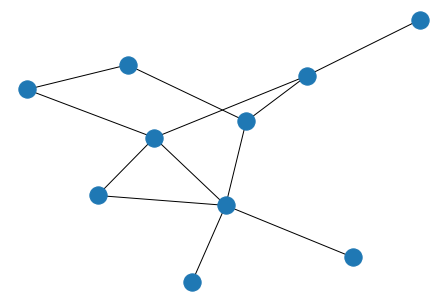

In [8]:
c=nx.clustering(G) 
c  
nx.draw(G)

### Data Prep

In [ ]:
#reads the csv
import geopandas as gpd
vs10to17 = intaker.Intake.getData('https://services1.arcgis.com/mVFRs7NF4iFitgbY/ArcGIS/rest/services/Hhchpov/FeatureServer/0/query?where=1%3D1&outFields=*&returnGeometry=true&f=pgeojson')
vs10to17.head(1)

In [46]:
vs10to17Ind = vs10to17[['CSA2010', 'hhchpov15',	'hhchpov16', 'hhchpov17', 'hhchpov18', 'hhchpov19'] ]
vs10to17Ind = vs10to17Ind.melt(id_vars='CSA2010', value_vars=['hhchpov15',	'hhchpov16', 'hhchpov17', 'hhchpov18', 'hhchpov19'])
vs10to17Ind.head()

,CSA2010,variable,value
0,Allendale/Irvington/S. Hilton,hhchpov15,38.931487
1,Beechfield/Ten Hills/West Hills,hhchpov15,19.416892
2,Belair-Edison,hhchpov15,36.882547
3,Brooklyn/Curtis Bay/Hawkins Point,hhchpov15,45.008801
4,Canton,hhchpov15,5.490849


In [47]:
vs10to17IndComm = vs10to17Ind.pivot('variable', 'CSA2010', 'value')
vs10to17IndComm

CSA2010,Allendale/Irvington/S. Hilton,Beechfield/Ten Hills/West Hills,Belair-Edison,Brooklyn/Curtis Bay/Hawkins Point,Canton,Cedonia/Frankford,Cherry Hill,Chinquapin Park/Belvedere,Claremont/Armistead,Clifton-Berea,Cross-Country/Cheswolde,Dickeyville/Franklintown,Dorchester/Ashburton,Downtown/Seton Hill,Edmondson Village,Fells Point,Forest Park/Walbrook,Glen-Fallstaff,Greater Charles Village/Barclay,Greater Govans,Greater Mondawmin,Greater Roland Park/Poplar Hill,Greater Rosemont,Greenmount East,Hamilton,Harbor East/Little Italy,Harford/Echodale,Highlandtown,Howard Park/West Arlington,Inner Harbor/Federal Hill,Lauraville,Loch Raven,Madison/East End,Medfield/Hampden/Woodberry/Remington,Midtown,Midway/Coldstream,Morrell Park/Violetville,Mount Washington/Coldspring,North Baltimore/Guilford/Homeland,Northwood,Oldtown/Middle East,Orangeville/East Highlandtown,Patterson Park North & East,Penn North/Reservoir Hill,Pimlico/Arlington/Hilltop,Poppleton/The Terraces/Hollins Market,Sandtown-Winchester/Harlem Park,South Baltimore,Southeastern,Southern Park Heights,Southwest Baltimore,The Waverlies,Upton/Druid Heights,Washington Village/Pigtown,Westport/Mount Winans/Lakeland
variable,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
hhchpov15,38.931487,19.416892,36.882547,45.008801,5.490849,23.345482,62.515723,16.493874,32.883093,34.932280,10.342224,28.861004,34.596982,11.666667,40.469062,13.196481,46.385224,27.512978,42.048055,39.080000,28.571429,7.652733,43.860132,37.705789,13.201821,48.872786,17.117117,15.205725,30.994475,18.129032,14.863103,17.322624,59.304511,14.421177,8.195021,48.240964,13.084746,8.096085,5.391433,13.901663,60.271572,24.084178,42.457923,42.544197,39.779513,65.723270,59.821650,3.237858,51.587302,51.345415,50.533420,27.025090,60.262829,36.734694,40.281974
hhchpov16,34.727823,21.220847,36.126984,46.447508,2.994012,20.574534,60.918367,18.154463,34.492519,47.579864,9.850668,29.828851,37.873874,13.079019,27.287762,6.785714,44.330814,30.681548,44.968732,42.551253,28.767123,8.474576,46.378322,38.253012,15.762813,40.180995,18.549157,21.197719,33.410006,9.171598,16.026993,17.197964,58.773982,11.312790,18.000000,44.501134,17.697729,5.918728,6.335549,11.769006,60.285320,21.852277,37.150556,40.456081,41.500853,65.254237,54.812174,0.123001,51.501416,50.180151,48.027102,37.340153,63.693865,42.672919,38.505747
hhchpov17,32.770530,23.916752,34.555625,46.409959,4.017217,19.963812,56.787964,23.162194,34.615385,47.924528,13.025459,34.451902,43.492770,13.372093,25.280599,7.336343,47.650417,27.400642,40.369231,47.240705,37.469136,3.792415,43.246623,36.447734,13.077790,33.364574,18.230648,14.610674,21.644774,8.212928,16.561656,6.473641,56.125654,8.452088,16.191562,49.336166,15.354018,3.796376,4.497258,9.751037,55.195090,22.486360,40.903427,46.640000,38.960245,57.445307,56.704165,0.118906,52.896725,48.490108,49.225293,44.224037,64.863124,34.242094,40.186480
hhchpov18,35.273791,21.904105,39.735752,39.891754,4.608939,15.529640,58.823529,12.376238,33.538251,50.104058,15.060064,20.465686,37.679149,8.074534,23.536100,11.256281,40.463918,26.230303,33.080070,44.286840,45.763994,2.800546,47.002221,39.011567,7.554380,33.402923,14.364641,15.151515,18.334235,7.267645,11.578509,12.104813,55.329405,6.997972,11.945813,40.830636,11.454905,4.645048,3.443223,9.154013,55.508637,18.710191,50.312695,42.607527,37.264151,59.105099,58.755090,0.371287,45.880612,41.626984,45.773875,42.046719,60.711887,28.032129,44.811801
hhchpov19,32.601602,15.384615,41.038850,41.388479,4.834254,17.905647,58.080194,11.683168,31.844888,39.654296,15.152378,12.348668,35.002158,6.169297,21.624650,8.425721,37.659381,28.945343,25.609096,46.453089,44.152047,2.256186,46.772865,45.657826,6.794589,32.803632,9.240100,21.975806,18.680710,7.024169,13.777219,17.239165,55.864324,6.446701,13.172043,35.834208,18.294271,2.288732,4.072398,9.772423,49.527559,13.424771,55.013459,38.382353,32.449903,51.431049,61.071093,0.000000,42.322457,30.489939,50.904137,37.535982,66.545718,38.116592,43.192272


## a. Calculate the correlation matrix

*cor_matrix* contains the full correlation matrix. The table below shows a snapshot of the first 5 rows.

In [51]:
#craetes a correlation matrix
cor_matrix = vs10to17IndComm.iloc[:,:].corr()
#shows the first 5 rows
cor_matrix.head(1)

CSA2010,Allendale/Irvington/S. Hilton,Beechfield/Ten Hills/West Hills,Belair-Edison,Brooklyn/Curtis Bay/Hawkins Point,Canton,Cedonia/Frankford,Cherry Hill,Chinquapin Park/Belvedere,Claremont/Armistead,Clifton-Berea,Cross-Country/Cheswolde,Dickeyville/Franklintown,Dorchester/Ashburton,Downtown/Seton Hill,Edmondson Village,Fells Point,Forest Park/Walbrook,Glen-Fallstaff,Greater Charles Village/Barclay,Greater Govans,Greater Mondawmin,Greater Roland Park/Poplar Hill,Greater Rosemont,Greenmount East,Hamilton,Harbor East/Little Italy,Harford/Echodale,Highlandtown,Howard Park/West Arlington,Inner Harbor/Federal Hill,Lauraville,Loch Raven,Madison/East End,Medfield/Hampden/Woodberry/Remington,Midtown,Midway/Coldstream,Morrell Park/Violetville,Mount Washington/Coldspring,North Baltimore/Guilford/Homeland,Northwood,Oldtown/Middle East,Orangeville/East Highlandtown,Patterson Park North & East,Penn North/Reservoir Hill,Pimlico/Arlington/Hilltop,Poppleton/The Terraces/Hollins Market,Sandtown-Winchester/Harlem Park,South Baltimore,Southeastern,Southern Park Heights,Southwest Baltimore,The Waverlies,Upton/Druid Heights,Washington Village/Pigtown,Westport/Mount Winans/Lakeland
CSA2010,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Allendale/Irvington/S. Hilton,1.0,0.014863,-0.119179,0.095415,0.470058,0.548944,0.88326,-0.104335,-0.102976,-0.503038,-0.560746,0.245054,-0.513196,0.219368,0.902809,0.824206,0.349305,-0.225704,0.455862,-0.95513,-0.55844,0.61754,-0.240447,-0.401832,0.301535,0.894259,0.356956,-0.399832,0.575175,0.894022,-0.128303,0.422069,0.688614,0.817967,-0.709692,0.407924,-0.593179,0.931204,0.337036,0.812526,0.721937,0.590431,-0.283071,0.036479,0.480814,0.771909,0.15346,0.920392,0.34112,0.555418,0.0125,-0.808695,-0.872919,-0.041575,-0.163644


In [52]:
#extracts the indices from the correlation matrix
lblVals = cor_matrix.index.values

In [53]:
#Changes from dataframe to matrix, so it is easier to create a graph with networkx
cor_matrix = np.asmatrix(cor_matrix)

In [54]:
cor_matrix

matrix([[ 1.        ,  0.01486326, -0.11917925, ..., -0.87291859,
         -0.04157519, -0.16364442],
        [ 0.01486326,  1.        , -0.73682806, ..., -0.32818969,
         -0.34654921, -0.28677534],
        [-0.11917925, -0.73682806,  1.        , ...,  0.08730828,
         -0.25687775,  0.81935146],
        ...,
        [-0.87291859, -0.32818969,  0.08730828, ...,  1.        ,
          0.43279691, -0.09677958],
        [-0.04157519, -0.34654921, -0.25687775, ...,  0.43279691,
          1.        , -0.7540497 ],
        [-0.16364442, -0.28677534,  0.81935146, ..., -0.09677958,
         -0.7540497 ,  1.        ]])

## b. Create graph

In [41]:
#Crates graph using the data of the correlation matrix
G = nx.from_numpy_matrix(cor_matrix)

#relabels the nodes to match the  stocks names
G = nx.relabel_nodes(G,lambda x: lblVals[x])

#Shows the first 5 edges with their corresponding edges
# OLD: G.edges(data=True)[:5]
list(G.edges(data=True))[0:5]

[('Allendale/Irvington/S. Hilton',
  'Allendale/Irvington/S. Hilton',
  {'weight': 1.0}),
 ('Allendale/Irvington/S. Hilton',
  'Beechfield/Ten Hills/West Hills',
  {'weight': 0.0148632552338115}),
 ('Allendale/Irvington/S. Hilton',
  'Belair-Edison',
  {'weight': -0.11917925099179705}),
 ('Allendale/Irvington/S. Hilton',
  'Brooklyn/Curtis Bay/Hawkins Point',
  {'weight': 0.09541481724704895}),
 ('Allendale/Irvington/S. Hilton', 'Canton', {'weight': 0.4700577440487724})]

## Part 5: Styling the nodes based on the number of edges linked (degree)

In [42]:
#export 
#function to create and display networks from the correlatin matrix. 

def create_corr_network_5(G, corr_direction, min_correlation):
    ##Creates a copy of the graph
    H = G.copy()
    
    ##Checks all the edges and removes some based on corr_direction
    for stock1, stock2, weight in G.edges(data=True):
        ##if we only want to see the positive correlations we then delete the edges with weight smaller than 0        
        if corr_direction == "positive":
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] <0 or weight["weight"] < min_correlation:
                H.remove_edge(stock1, stock2)
        ##this part runs if the corr_direction is negative and removes edges with weights equal or largen than 0
        else:
            ####it adds a minimum value for correlation. 
            ####If correlation weaker than the min, then it deletes the edge
            if weight["weight"] >=0 or weight["weight"] > min_correlation:
                H.remove_edge(stock1, stock2)
                
    
    #crates a list for edges and for the weights
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    
    ### increases the value of weights, so that they are more visible in the graph
    weights = tuple([(1+abs(x))**2 for x in weights])
    
    #####calculates the degree of each node
    d = nx.degree(H)
    #####creates list of nodes and a list their degrees that will be used later for their sizes
    nodelist, node_sizes = zip(*d)

    #positions
    positions=nx.circular_layout(H)
    
    #Figure size
    plt.figure(figsize=(15,15))

    #draws nodes
    nx.draw_networkx_nodes(H,positions,node_color='#DA70D6',nodelist=nodelist,
                           #####the node size will be now based on its degree
                           node_size=tuple([x**3 for x in node_sizes]),alpha=0.8)
    
    #Styling for labels
    nx.draw_networkx_labels(H, positions, font_size=8, 
                            font_family='sans-serif')
    
    ###edge colors based on weight direction
    if corr_direction == "positive":
        edge_colour = plt.cm.GnBu 
    else:
        edge_colour = plt.cm.PuRd
        
    #draws the edges
    nx.draw_networkx_edges(H, positions, edges,style='solid',
                          ###adds width=weights and edge_color = weights 
                          ###so that edges are based on the weight parameter 
                          ###edge_cmap is for the color scale based on the weight
                          ### edge_vmin and edge_vmax assign the min and max weights for the width
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))

    # displays the graph without axis
    plt.axis('off')
    #saves image
    plt.savefig("part5" + corr_direction + ".png", format="PNG")
    plt.show() 


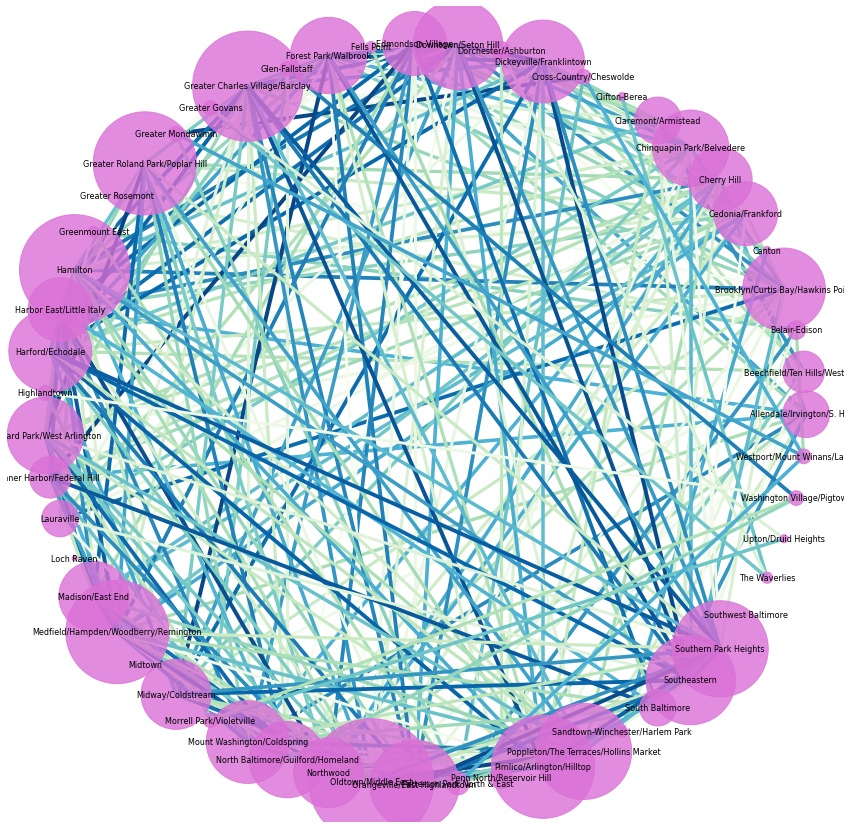

In [43]:
create_corr_network_5(G, corr_direction="positive",min_correlation=0.7)

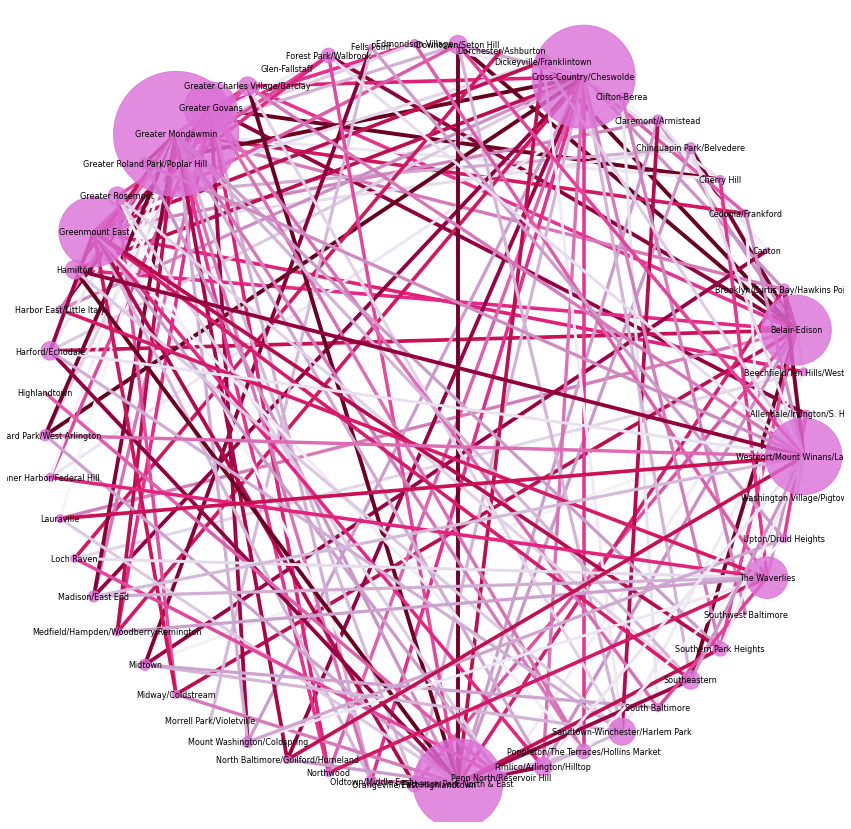

In [44]:
create_corr_network_5(G, corr_direction="negative",min_correlation=-0.7)